<a href="https://colab.research.google.com/github/PRANAV-rgb20/DEEP-LEARNING/blob/main/CONVULATIONAL_NEURAL_NETWORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 97s 48ms/step - accuracy: 0.8744 - loss: 0.5357 - val_accuracy: 0.9845 - val_loss: 0.1531
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 91s 48ms/step - accuracy: 0.9720 - loss: 0.1878 - val_accuracy: 0.9893 - val_loss: 0.1172
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 90s 48ms/step - accuracy: 0.9750 - loss: 0.1640 - val_accuracy: 0.9897 - val_loss: 0.1157
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 48ms/step - accuracy: 0.9770 - loss: 0.1577 - val_accuracy: 0.9875 - val_loss: 0.1210
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 143s 48ms/step - accuracy: 0.9778 - loss: 0.1561 - val_accuracy: 0.9826 - val_loss: 0.1352
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 48ms/step - accuracy: 0.9784 - loss: 0.1485 - val_accuracy: 0.9898 - val_loss: 0.1119
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 89s 47ms/step - accuracy: 0.9801 - loss: 0.1457 - val_accuracy: 0.9890 - val_loss: 0.1115
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 47ms/step - accuracy: 0.98

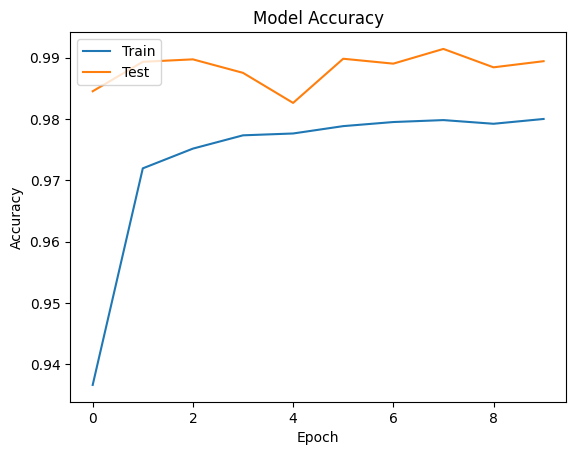

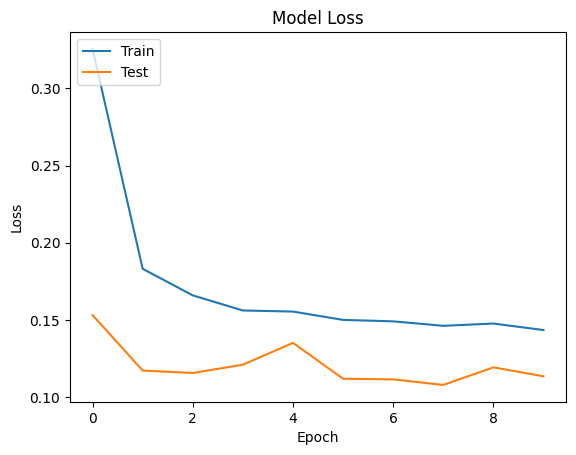

Test Loss: 0.1135188564658165


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_imgs, train_labels), (test_imgs, test_labels) = datasets.mnist.load_data()
train_imgs = train_imgs.reshape((train_imgs.shape[0], 28, 28, 1)).astype('float32') / 255
test_imgs = test_imgs.reshape((test_imgs.shape[0], 28, 28, 1)).astype('float32') / 255

# Build the CNN model with modifications
model = models.Sequential()

# Add convolutional, batch normalization, and dropout layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

# Flatten the output and add dense layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

# Output layer for classification
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
hist = model.fit(train_imgs, train_labels, epochs=10, validation_data=(test_imgs, test_labels))

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_imgs, test_labels)
print(f'Test Accuracy: {test_acc}')

# Plot training & validation accuracy values
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

print(f'Test Loss: {test_loss}')

